In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import cactas as C

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Util.load(DATAPATH)

In [6]:
images, labels = C.Util.shuffle(images, labels)

In [7]:
images, labels = C.Util.normalize(images, labels)

In [8]:
X_train, X_val, y_train, y_val = C.Util.split_2(images, labels, val_size=0.2)

In [10]:
train_gen = C.Util.augment(X_train, y_train)

2023-04-04 12:43:56.408094: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [12]:
model = C.Util.create_unet(images[0].shape)

2023-04-04 12:44:40.776063: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-04 12:44:41.053970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 12:44:41.056600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 12:44:41.056624: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-04 12:44:41.083613: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-04 

In [14]:
model, history = C.Util.train_unet(train_gen, X_train, y_train, X_val, y_val, model, epochs=200)

2023-04-04 12:45:20.852147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-04 12:45:20.854474: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-04-04 12:45:22.077288: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-04 12:45:22.986251: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-04 12:45:24.008669: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-04 12:45:24.008696: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-04 12:45:24.009091: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-04 12:45:24.099727: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-04 12:45:25.110295: I tensorflow/stream_exec

20/20 [==============================] - 54s 2s/step - loss: 0.2520 - iou: 2.0479e-04 - iou_thresholded: 9.1429e-04 - val_loss: 0.0065 - val_iou: 6.7637e-05 - val_iou_thresholded: 7.4643e-04
Epoch 2/200
20/20 [==============================] - 19s 967ms/step - loss: 0.0049 - iou: 2.9972e-04 - iou_thresholded: 7.6295e-04 - val_loss: 0.0024 - val_iou: 2.4361e-04 - val_iou_thresholded: 7.4643e-04
Epoch 3/200
20/20 [==============================] - 19s 961ms/step - loss: 0.0024 - iou: 4.6991e-04 - iou_thresholded: 8.8250e-04 - val_loss: 0.0018 - val_iou: 3.9595e-04 - val_iou_thresholded: 7.4643e-04
Epoch 4/200
20/20 [==============================] - 19s 964ms/step - loss: 0.0021 - iou: 6.8003e-04 - iou_thresholded: 8.2132e-04 - val_loss: 0.0021 - val_iou: 7.1102e-04 - val_iou_thresholded: 7.4643e-04
Epoch 5/200
20/20 [==============================] - 19s 964ms/step - loss: 0.0018 - iou: 0.0010 - iou_thresholded: 9.4605e-04 - val_loss: 0.0015 - val_iou: 0.0021 - val_iou_thresholded: 7.46

20/20 [==============================] - 19s 959ms/step - loss: 3.8467e-04 - iou: 0.3546 - iou_thresholded: 0.4743 - val_loss: 3.8853e-04 - val_iou: 0.3071 - val_iou_thresholded: 0.4688
Epoch 43/200
20/20 [==============================] - 19s 966ms/step - loss: 3.7603e-04 - iou: 0.3639 - iou_thresholded: 0.4922 - val_loss: 4.1643e-04 - val_iou: 0.2845 - val_iou_thresholded: 0.4755
Epoch 44/200
20/20 [==============================] - 19s 962ms/step - loss: 3.5852e-04 - iou: 0.3753 - iou_thresholded: 0.4981 - val_loss: 3.6058e-04 - val_iou: 0.3301 - val_iou_thresholded: 0.4912
Epoch 45/200
20/20 [==============================] - 19s 962ms/step - loss: 3.5955e-04 - iou: 0.3812 - iou_thresholded: 0.5063 - val_loss: 3.7221e-04 - val_iou: 0.3169 - val_iou_thresholded: 0.5060
Epoch 46/200
20/20 [==============================] - 19s 965ms/step - loss: 3.5163e-04 - iou: 0.3818 - iou_thresholded: 0.5082 - val_loss: 3.3375e-04 - val_iou: 0.3732 - val_iou_thresholded: 0.4871
Epoch 47/200
20/20

20/20 [==============================] - 19s 961ms/step - loss: 2.1411e-04 - iou: 0.5257 - iou_thresholded: 0.6372 - val_loss: 2.9288e-04 - val_iou: 0.4368 - val_iou_thresholded: 0.5634
Epoch 84/200
20/20 [==============================] - 19s 967ms/step - loss: 2.1384e-04 - iou: 0.5226 - iou_thresholded: 0.6310 - val_loss: 2.9211e-04 - val_iou: 0.4190 - val_iou_thresholded: 0.5649
Epoch 85/200
20/20 [==============================] - 19s 962ms/step - loss: 2.2525e-04 - iou: 0.5154 - iou_thresholded: 0.6311 - val_loss: 2.9223e-04 - val_iou: 0.4438 - val_iou_thresholded: 0.5547
Epoch 86/200
20/20 [==============================] - 19s 963ms/step - loss: 2.1461e-04 - iou: 0.5290 - iou_thresholded: 0.6405 - val_loss: 2.8470e-04 - val_iou: 0.4318 - val_iou_thresholded: 0.5637
Epoch 87/200
20/20 [==============================] - 19s 966ms/step - loss: 2.1199e-04 - iou: 0.5321 - iou_thresholded: 0.6472 - val_loss: 2.8497e-04 - val_iou: 0.4480 - val_iou_thresholded: 0.5626
Epoch 88/200
20/20

20/20 [==============================] - 19s 961ms/step - loss: 1.6088e-04 - iou: 0.6001 - iou_thresholded: 0.6902 - val_loss: 2.9764e-04 - val_iou: 0.4917 - val_iou_thresholded: 0.5751
Epoch 125/200
20/20 [==============================] - 19s 966ms/step - loss: 1.5951e-04 - iou: 0.6055 - iou_thresholded: 0.7074 - val_loss: 3.1422e-04 - val_iou: 0.4955 - val_iou_thresholded: 0.5624
Epoch 126/200
20/20 [==============================] - 19s 967ms/step - loss: 1.6573e-04 - iou: 0.6044 - iou_thresholded: 0.7043 - val_loss: 2.8506e-04 - val_iou: 0.4735 - val_iou_thresholded: 0.5670
Epoch 127/200
20/20 [==============================] - 19s 961ms/step - loss: 1.5963e-04 - iou: 0.6046 - iou_thresholded: 0.6999 - val_loss: 3.0009e-04 - val_iou: 0.4930 - val_iou_thresholded: 0.5715
Epoch 128/200
20/20 [==============================] - 19s 969ms/step - loss: 1.5333e-04 - iou: 0.6228 - iou_thresholded: 0.7202 - val_loss: 3.1837e-04 - val_iou: 0.4930 - val_iou_thresholded: 0.5576
Epoch 129/200


20/20 [==============================] - 19s 963ms/step - loss: 1.0620e-04 - iou: 0.7168 - iou_thresholded: 0.7988 - val_loss: 3.3120e-04 - val_iou: 0.5288 - val_iou_thresholded: 0.5799
Epoch 166/200
20/20 [==============================] - 19s 964ms/step - loss: 1.0531e-04 - iou: 0.7164 - iou_thresholded: 0.7962 - val_loss: 3.5718e-04 - val_iou: 0.5320 - val_iou_thresholded: 0.5744
Epoch 167/200
20/20 [==============================] - 19s 966ms/step - loss: 1.0190e-04 - iou: 0.7254 - iou_thresholded: 0.8055 - val_loss: 3.4545e-04 - val_iou: 0.5233 - val_iou_thresholded: 0.5724
Epoch 168/200
20/20 [==============================] - 19s 967ms/step - loss: 1.0184e-04 - iou: 0.7236 - iou_thresholded: 0.8050 - val_loss: 3.7893e-04 - val_iou: 0.5327 - val_iou_thresholded: 0.5683
Epoch 169/200
20/20 [==============================] - 19s 969ms/step - loss: 1.0325e-04 - iou: 0.7235 - iou_thresholded: 0.7983 - val_loss: 3.3129e-04 - val_iou: 0.5220 - val_iou_thresholded: 0.5772
Epoch 170/200


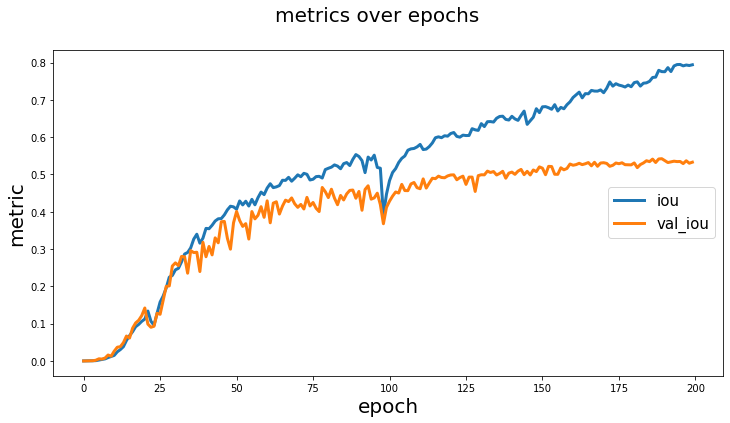

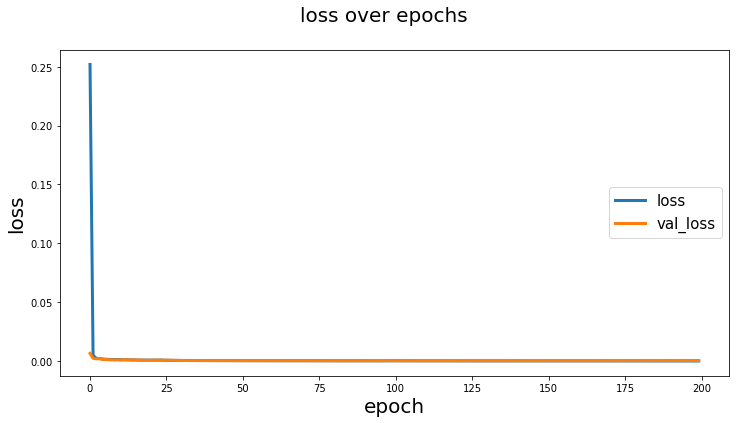

In [15]:
C.Util.visualize_graph(history)

In [17]:
y_pred = C.Util.prediction(X_val, model)

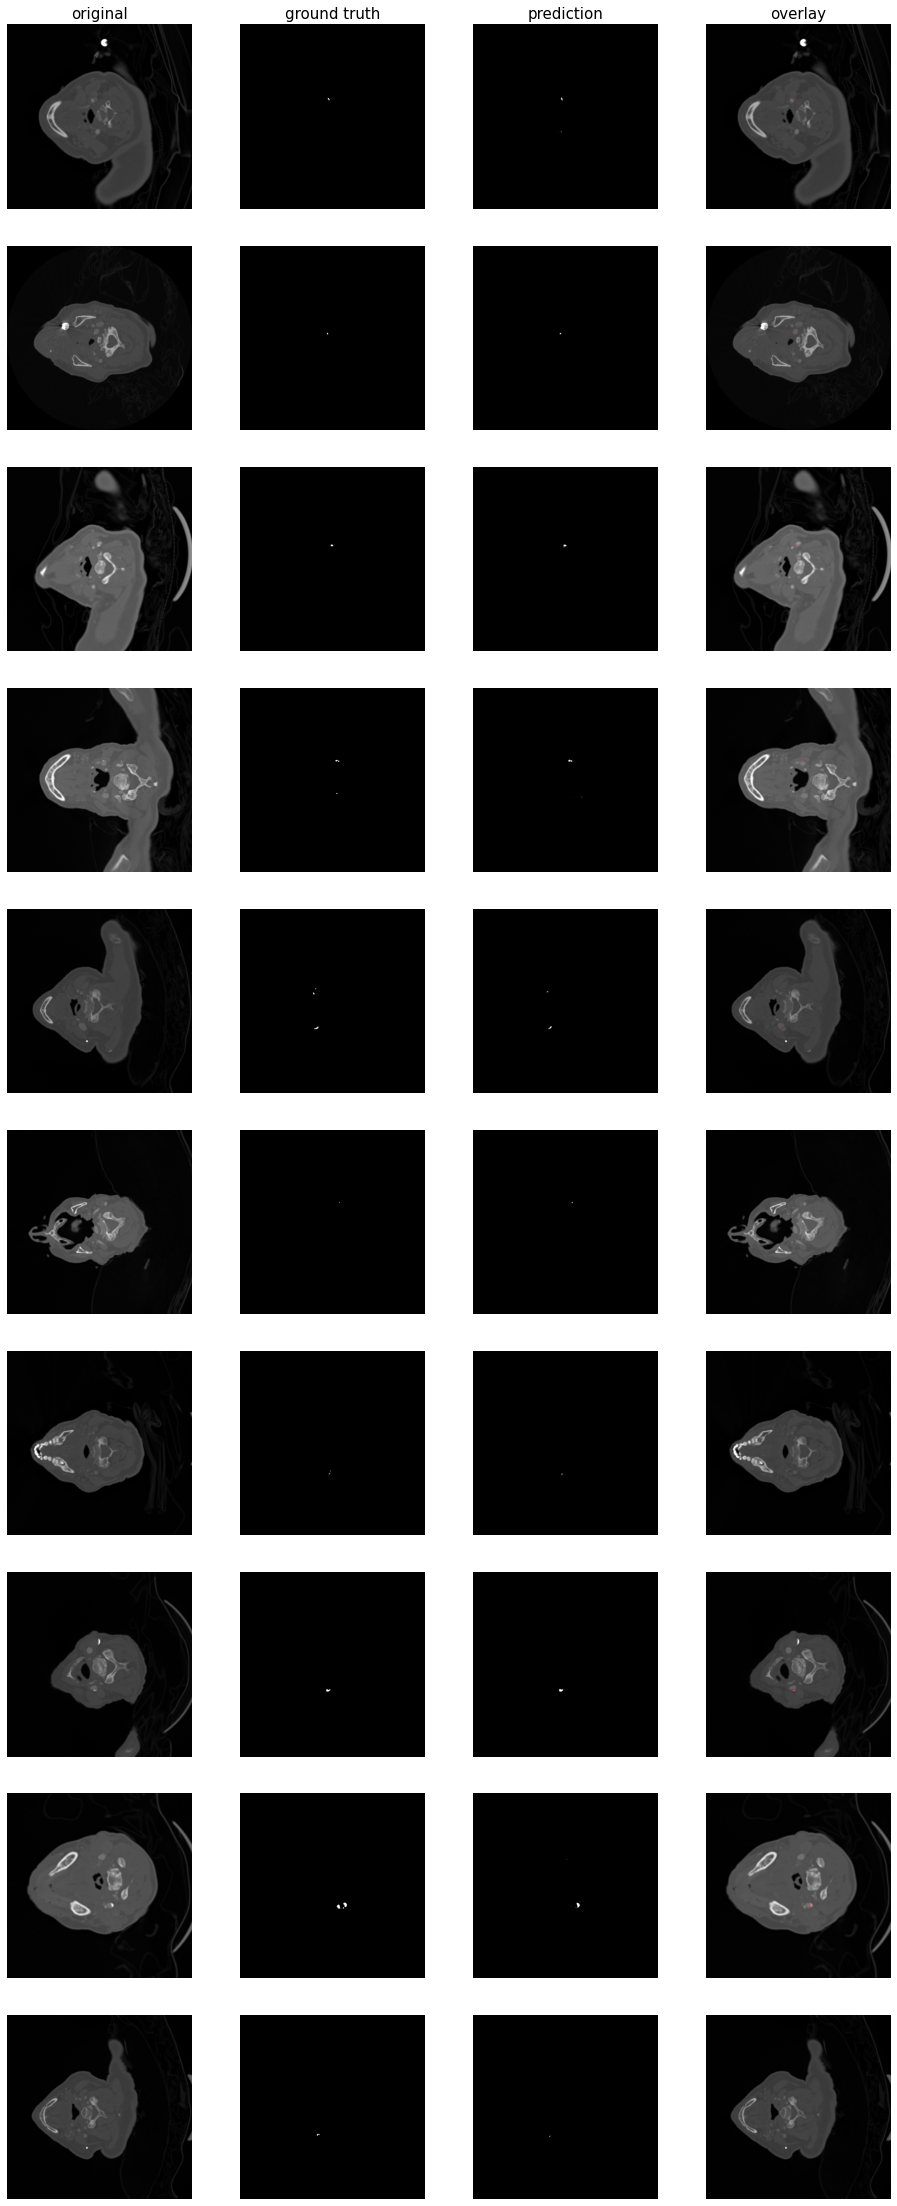

In [18]:
C.Util.visualize_result(X_val, y_val, y_pred)

In [20]:
C.Util.evaluate(X_val, y_val, model)

5/5 [==============================] - 1s 202ms/step - loss: 4.1775e-04 - iou: 0.5330 - iou_thresholded: 0.5618
